# Introduction

Full write up: [Scottish People Are More Inclined to Skip the Gym and Watch the Footy than English People](https://www.aidancooper.co.uk/scottish-people-are-more-inclined-to-skip-the-gym)

## Set-Up

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import seaborn as sns

from datetime import datetime, time
from pathlib import Path

from utils import prep_data, prep_data_stats, plot_match

In [2]:
ROOT_DIR = Path().resolve()
plt.style.use(ROOT_DIR / "style.mplstyle")
colours = ["red", "blue"]
norm = True  # normalise English and Scottish gyms to have same mean occupancy at baseline

## Load Data

In [3]:
df_raw = pd.read_csv(ROOT_DIR / "euro2020_england_scotland.csv", parse_dates=["datetime"]).dropna()
print(df_raw.shape)
df_raw

(126990, 4)


,datetime,country,gym,occupancy
0,2021-05-01 11:30:00,England,A,38.0
1,2021-05-01 11:30:00,England,B,54.0
2,2021-05-01 11:30:00,England,C,36.0
3,2021-05-01 11:30:00,England,D,54.0
4,2021-05-01 11:30:00,England,E,51.0
...,...,...,...,...
126985,2021-06-22 23:45:00,Scotland,V,3.0
126986,2021-06-22 23:45:00,Scotland,W,5.0
126987,2021-06-22 23:45:00,Scotland,X,9.0
126988,2021-06-22 23:45:00,Scotland,Y,11.0


## Visualise Matches

### England vs Scotland

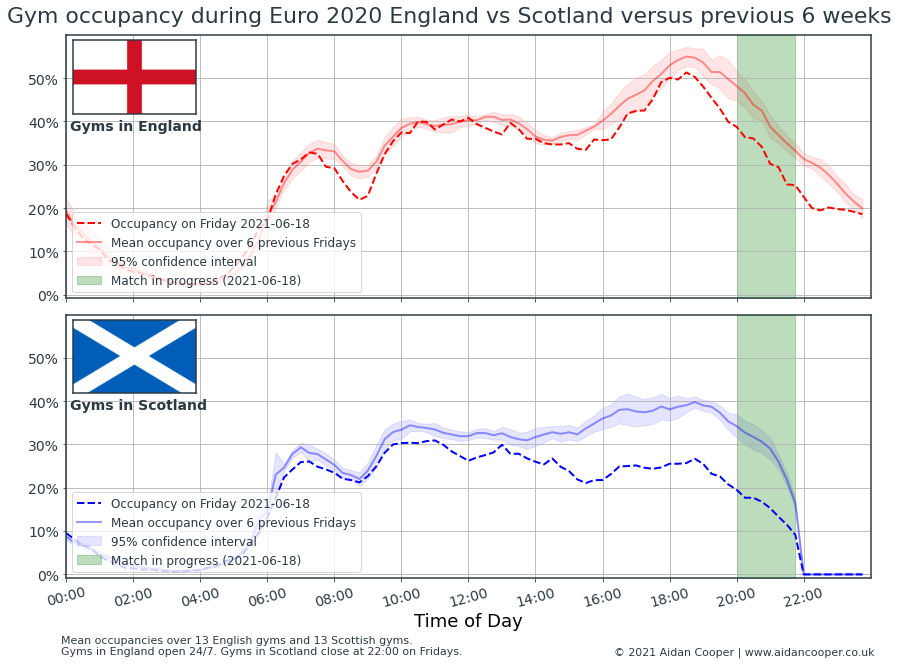

In [4]:
match_date = "2021-06-18"
team_A = "England"
team_B = "Scotland"
kickoff = 20


# prepare data
df = prep_data(df_raw, match_date)


# plot gym occupancy levels
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 9))

for i, country in enumerate(["England", "Scotland"]):
    plot_match(df, match_date, country, kickoff, colours[i], ax[i])

ax[0].set_xlabel("")
fig.suptitle(
    f"Gym occupancy during Euro 2020 {team_A} vs {team_B} versus previous 6 weeks",
    fontsize=22,
)
fig.text(
    0.05,
    -0.02,
    "Mean occupancies over 13 English gyms and 13 Scottish gyms.\n"
    "Gyms in England open 24/7. Gyms in Scotland close at 22:00 on Fridays.",
    fontsize=11,
)
fig.text(
    0.69,
    -0.02,
    "© 2021 Aidan Cooper | www.aidancooper.co.uk",
    fontsize=11,
)
fig.tight_layout()
fig.savefig(ROOT_DIR / "figures" / "eng_vs_sct.png")
fig

#### Kick-off statistics

In [5]:
df_stats = prep_data_stats(df, kickoff, norm=norm)
df_stats

,country,gym,week,occupancy
0,England,A,w1-6,0.754393
1,England,B,w1-6,1.243351
2,England,C,w1-6,1.145559
3,England,D,w1-6,1.089678
4,England,E,w1-6,1.477352
5,England,F,w1-6,1.082693
6,England,G,w1-6,0.457525
7,England,H,w1-6,1.589114
8,England,I,w1-6,0.746010
9,England,J,w1-6,0.810273


In [6]:
pg.mixed_anova(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,0.19346,1,24,0.19346,1.39957,0.24838,0.05510,NaN
1,week,1.24581,1,24,1.24581,77.72483,0.00000,0.76407,1.0
2,Interaction,0.19346,1,24,0.19346,12.06964,0.00196,0.33462,NaN


In [7]:
pg.pairwise_ttests(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,7.339712e+00,25.0,two-sided,1.088872e-07,1.392e+05,1.066182e+00
1,country,-,England,Scotland,False,True,1.183034e+00,24.0,two-sided,2.483830e-01,0.605,4.493705e-01
2,week * country,w1-6,England,Scotland,False,True,-1.832507e-15,24.0,two-sided,1.000000e+00,0.363,-6.960705e-16
3,week * country,w7,England,Scotland,False,True,2.564728e+00,24.0,two-sided,1.700429e-02,3.477,9.742017e-01


In [8]:
# percentage change in occupancy vs baseline
change_eng_sct = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_eng_sct

,occupancy
country,
England,-18.76
Scotland,-43.16


#### AUC statistics

In [9]:
df_stats = prep_data_stats(df, kickoff, norm=norm, metric="auc")
df_stats

,country,gym,week,auc
0,England,A,w1-6,18.896310
2,England,B,w1-6,27.513682
4,England,C,w1-6,23.362564
6,England,D,w1-6,26.923786
8,England,E,w1-6,27.348594
10,England,F,w1-6,25.278114
12,England,G,w1-6,10.070468
14,England,H,w1-6,43.556809
16,England,I,w1-6,16.387671
18,England,J,w1-6,20.593903


In [10]:
pg.mixed_anova(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,40.92830,1,24,40.92830,0.36851,0.54952,0.01512,NaN
1,week,195.45285,1,24,195.45285,29.75049,0.00001,0.55349,1.0
2,Interaction,46.16142,1,24,46.16142,7.02637,0.01400,0.22646,NaN


In [11]:
pg.pairwise_ttests(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,4.896114,25.0,two-sided,0.000049,509.894,0.500576
1,country,-,England,Scotland,False,True,0.607054,24.0,two-sided,0.549516,0.416,0.230587
2,week * country,w1-6,England,Scotland,False,True,-0.032786,24.0,two-sided,0.974116,0.363,-0.012454
3,week * country,w7,England,Scotland,False,True,1.399367,24.0,two-sided,0.174495,0.739,0.531544


In [12]:
# percentage change in occupancy vs baseline
change_eng_sct_auc = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_eng_sct_auc

,auc
country,
England,-8.36
Scotland,-24.06


### England vs Croatia

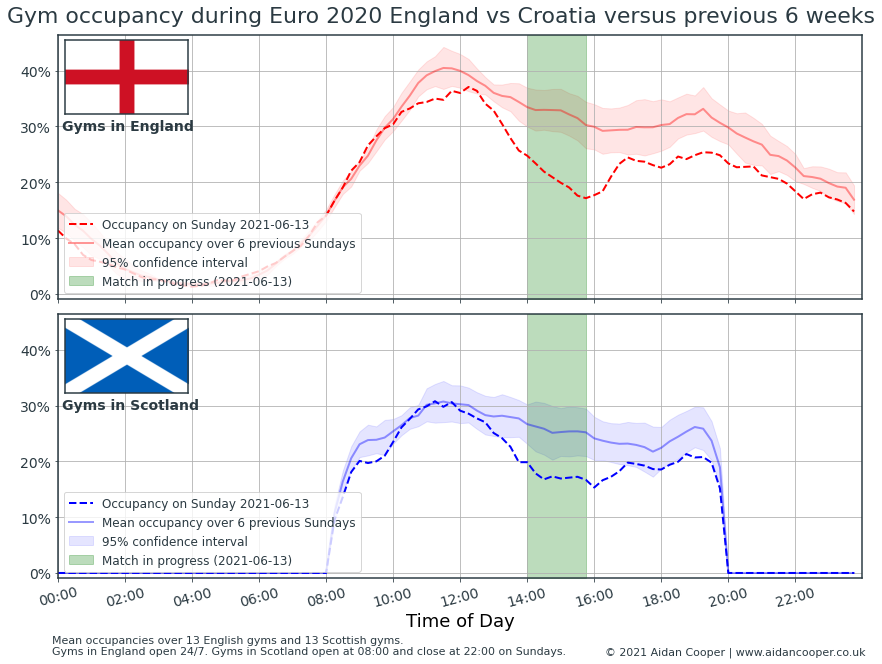

In [13]:
match_date = "2021-06-13"
team_A = "England"
team_B = "Croatia"
kickoff = 14.0


# prepare data
df = prep_data(df_raw, match_date)


# plot gym occupancy levels
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 9))

for i, country in enumerate(["England", "Scotland"]):
    plot_match(df, match_date, country, kickoff, colours[i], ax[i])

ax[0].set_xlabel("")
fig.suptitle(
    f"Gym occupancy during Euro 2020 {team_A} vs {team_B} versus previous 6 weeks",
    fontsize=22,
)
fig.text(
    0.05,
    -0.02,
    "Mean occupancies over 13 English gyms and 13 Scottish gyms.\n"
    "Gyms in England open 24/7. Gyms in Scotland open at 08:00 and close at 22:00 on Sundays.",
    fontsize=11,
)
fig.text(
    0.69,
    -0.02,
    "© 2021 Aidan Cooper | www.aidancooper.co.uk",
    fontsize=11,
)
fig.tight_layout()
fig.savefig(ROOT_DIR / "figures" / "eng_vs_cro.png")
fig

#### Kick-off statistics

In [14]:
df_stats = prep_data_stats(df, kickoff, norm=norm)
pg.mixed_anova(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,0.00001,1,24,0.00001,0.00005,0.99428,0.00000,NaN
1,week,0.82490,1,24,0.82490,81.68522,0.00000,0.77291,1.0
2,Interaction,0.00001,1,24,0.00001,0.00101,0.97495,0.00004,NaN


In [15]:
pg.pairwise_ttests(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,9.22416,25.0,two-sided,0.00000,7.229e+06,0.79307
1,country,-,England,Scotland,False,True,-0.00724,24.0,two-sided,0.99428,0.363,-0.00275
2,week * country,w1-6,England,Scotland,False,True,-0.00000,24.0,two-sided,1.00000,0.363,-0.00000
3,week * country,w7,England,Scotland,False,True,-0.01438,24.0,two-sided,0.98865,0.363,-0.00546


In [16]:
# percentage change in occupancy vs baseline
change_eng_cro = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_eng_cro

,occupancy
country,
England,-25.28
Scotland,-25.10


#### AUC statistics

In [17]:
df_stats = prep_data_stats(df, kickoff, norm=norm, metric="auc")
pg.mixed_anova(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,0.58357,1,24,0.58357,0.00453,0.94688,0.00019,NaN
1,week,190.30546,1,24,190.30546,48.90030,0.00000,0.67078,1.0
2,Interaction,0.01052,1,24,0.01052,0.00270,0.95896,0.00011,NaN


In [18]:
pg.pairwise_ttests(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,7.136671,25.0,two-sided,1.764778e-07,8.885e+04,0.472267
1,country,-,England,Scotland,False,True,-0.067330,24.0,two-sided,9.468770e-01,0.363,-0.025575
2,week * country,w1-6,England,Scotland,False,True,-0.051822,24.0,two-sided,9.590997e-01,0.363,-0.019684
3,week * country,w7,England,Scotland,False,True,-0.085636,24.0,two-sided,9.324661e-01,0.364,-0.032529


In [19]:
# percentage change in occupancy vs baseline
change_eng_cro_auc = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_eng_cro_auc

,auc
country,
England,-16.18
Scotland,-15.82


### Scotland vs Czech Republic

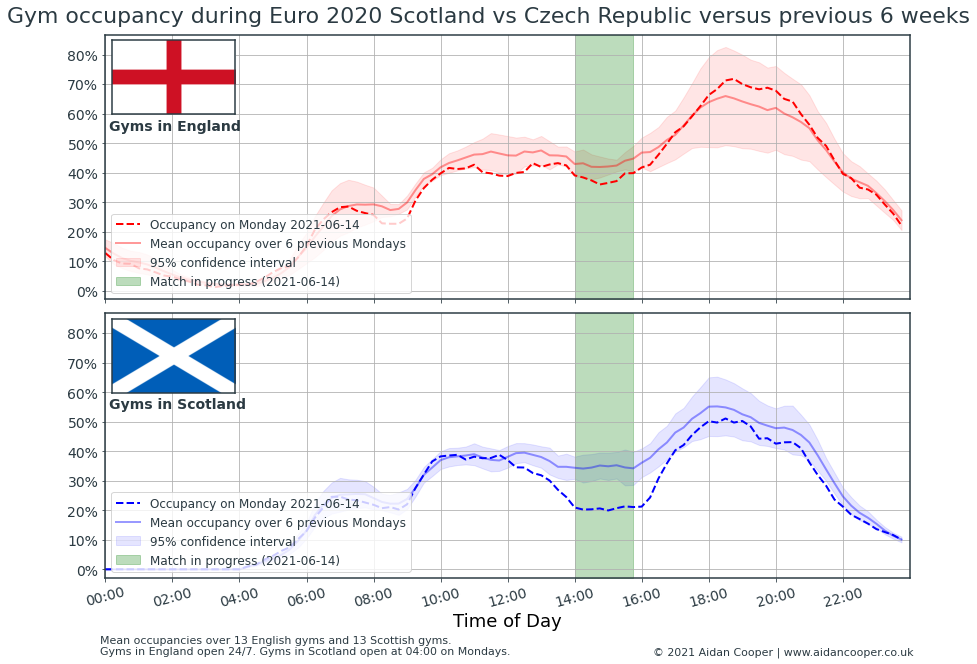

In [20]:
match_date = "2021-06-14"
team_A = "Scotland"
team_B = "Czech Republic"
kickoff = 14.0


# prepare data
df = prep_data(df_raw, match_date)


# plot gym occupancy levels
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 9))

for i, country in enumerate(["England", "Scotland"]):
    plot_match(df, match_date, country, kickoff, colours[i], ax[i])

ax[0].set_xlabel("")
fig.suptitle(
    f"Gym occupancy during Euro 2020 {team_A} vs {team_B} versus previous 6 weeks",
    fontsize=22,
)
fig.text(
    0.05,
    -0.02,
    "Mean occupancies over 13 English gyms and 13 Scottish gyms.\n"
    "Gyms in England open 24/7. Gyms in Scotland open at 04:00 on Mondays.",
    fontsize=11,
)
fig.text(
    0.69,
    -0.02,
    "© 2021 Aidan Cooper | www.aidancooper.co.uk",
    fontsize=11,
)
fig.tight_layout()
fig.savefig(ROOT_DIR / "figures" / "sct_vs_cze.png")
fig

#### Kick-off statistics

In [21]:
df_stats = prep_data_stats(df, kickoff, norm=norm)
pg.mixed_anova(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,0.29567,1,24,0.29567,1.27578,0.26985,0.05047,NaN
1,week,0.75310,1,24,0.75310,35.48586,0.00000,0.59654,1.0
2,Interaction,0.29567,1,24,0.29567,13.93188,0.00103,0.36729,NaN


In [22]:
pg.pairwise_ttests(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,4.83610,25.0,two-sided,0.00006,443.052,0.64940
1,country,-,England,Scotland,False,True,1.12951,24.0,two-sided,0.26985,0.579,0.42904
2,week * country,w1-6,England,Scotland,False,True,0.00000,24.0,two-sided,1.00000,0.363,0.00000
3,week * country,w7,England,Scotland,False,True,2.24629,24.0,two-sided,0.03416,2.12,0.85324


In [23]:
# percentage change in occupancy vs baseline
change_sct_cze = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_sct_cze

,occupancy
country,
England,-8.99
Scotland,-39.15


#### AUC statistics

In [24]:
df_stats = prep_data_stats(df, kickoff, norm=norm, metric="auc")
pg.mixed_anova(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,14.55561,1,24,14.55561,0.11639,0.73595,0.00483,NaN
1,week,43.22678,1,24,43.22678,22.38836,0.00008,0.48263,1.0
2,Interaction,17.18161,1,24,17.18161,8.89884,0.00646,0.27049,NaN


In [25]:
pg.pairwise_ttests(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,4.124686,25.0,two-sided,0.000359,84.961,0.228854
1,country,-,England,Scotland,False,True,0.341165,24.0,two-sided,0.735949,0.379,0.129590
2,week * country,w1-6,England,Scotland,False,True,-0.027211,24.0,two-sided,0.978516,0.363,-0.010336
3,week * country,w7,England,Scotland,False,True,0.769550,24.0,two-sided,0.449075,0.452,0.292311


In [26]:
# percentage change in occupancy vs baseline
change_sct_cze_auc = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_sct_cze_auc

,auc
country,
England,-2.82
Scotland,-12.41


### Croatia vs Czech Republic

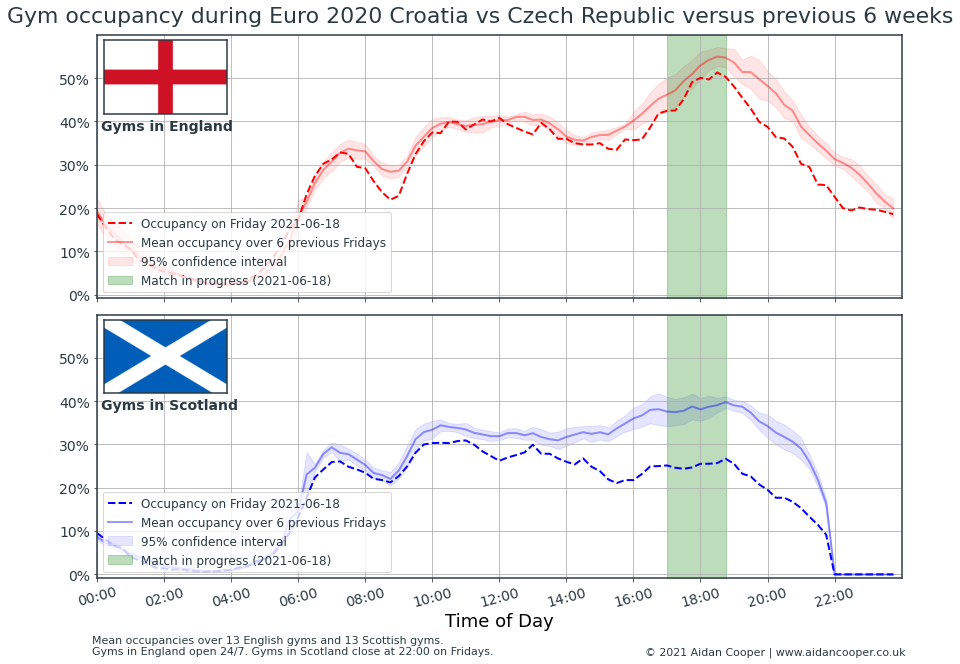

In [27]:
match_date = "2021-06-18"
team_A = "Croatia"
team_B = "Czech Republic"
kickoff = 17.0


# prepare data
df = prep_data(df_raw, match_date)


# plot gym occupancy levels
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 9))

for i, country in enumerate(["England", "Scotland"]):
    plot_match(df, match_date, country, kickoff, colours[i], ax[i])

ax[0].set_xlabel("")
fig.suptitle(
    f"Gym occupancy during Euro 2020 {team_A} vs {team_B} versus previous 6 weeks",
    fontsize=22,
)
fig.text(
    0.05,
    -0.02,
    "Mean occupancies over 13 English gyms and 13 Scottish gyms.\n"
    "Gyms in England open 24/7. Gyms in Scotland close at 22:00 on Fridays.",
    fontsize=11,
)
fig.text(
    0.69,
    -0.02,
    "© 2021 Aidan Cooper | www.aidancooper.co.uk",
    fontsize=11,
)
fig.tight_layout()
fig.savefig(ROOT_DIR / "figures" / "cro_vs_cze.png")
fig

#### Kick-off statistics

In [28]:
df_stats = prep_data_stats(df, kickoff, norm=norm)
pg.mixed_anova(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,0.22560,1,24,0.22560,1.18903,0.28635,0.04720,NaN
1,week,0.55292,1,24,0.55292,27.58160,0.00002,0.53472,1.0
2,Interaction,0.22560,1,24,0.22560,11.25389,0.00263,0.31922,NaN


In [29]:
pg.pairwise_ttests(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,4.42259,25.0,two-sided,0.00017,168.911,0.61322
1,country,-,England,Scotland,False,True,1.09043,24.0,two-sided,0.28635,0.561,0.41419
2,week * country,w1-6,England,Scotland,False,True,0.00000,24.0,two-sided,1.00000,0.363,0.00000
3,week * country,w7,England,Scotland,False,True,2.19960,24.0,two-sided,0.03771,1.98,0.83551


In [30]:
# percentage change in occupancy vs baseline
change_cro_cze = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_cro_cze

,occupancy
country,
England,-7.45
Scotland,-33.80


#### AUC statistics

In [31]:
df_stats = prep_data_stats(df, kickoff, norm=norm, metric="auc")
pg.mixed_anova(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,40.92830,1,24,40.92830,0.36851,0.54952,0.01512,NaN
1,week,195.45285,1,24,195.45285,29.75049,0.00001,0.55349,1.0
2,Interaction,46.16142,1,24,46.16142,7.02637,0.01400,0.22646,NaN


In [32]:
pg.pairwise_ttests(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,4.896114,25.0,two-sided,0.000049,509.894,0.500576
1,country,-,England,Scotland,False,True,0.607054,24.0,two-sided,0.549516,0.416,0.230587
2,week * country,w1-6,England,Scotland,False,True,-0.032786,24.0,two-sided,0.974116,0.363,-0.012454
3,week * country,w7,England,Scotland,False,True,1.399367,24.0,two-sided,0.174495,0.739,0.531544


In [33]:
# percentage change in occupancy vs baseline
change_cro_cze_auc = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_cro_cze_auc

,auc
country,
England,-8.36
Scotland,-24.06


### England vs Czech Republic AND Scotland vs Croatia

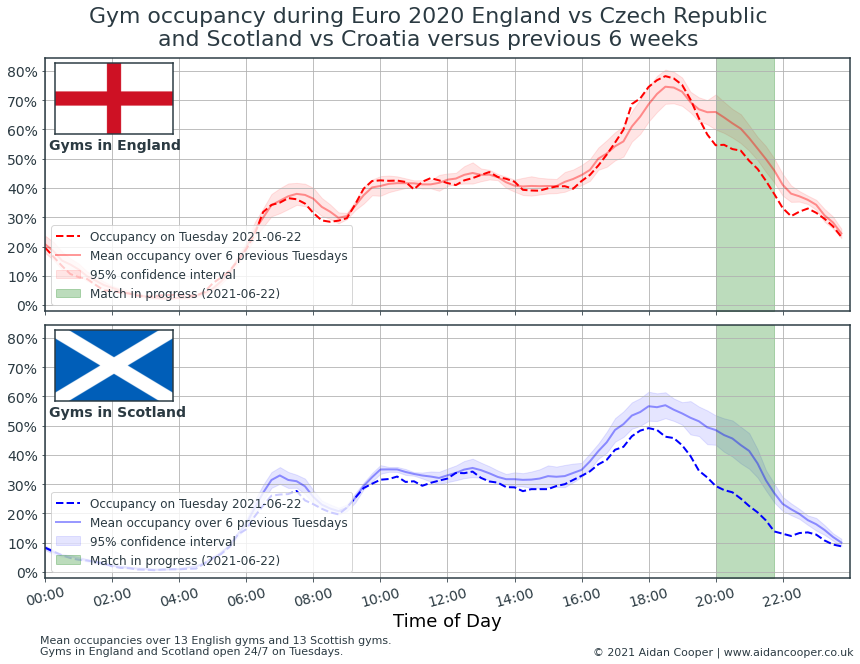

In [34]:
match_date = "2021-06-22"
team_A = "Scotland"
team_B = "Croatia"
kickoff = 20.0


# prepare data
df = prep_data(df_raw, match_date)


# plot gym occupancy levels
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 9))

for i, country in enumerate(["England", "Scotland"]):
    plot_match(df, match_date, country, kickoff, colours[i], ax[i])

ax[0].set_xlabel("")
fig.suptitle(
    f"Gym occupancy during Euro 2020 England vs Czech Republic\nand Scotland vs Croatia versus previous 6 weeks",
    fontsize=22,
)
fig.text(
    0.05,
    -0.02,
    "Mean occupancies over 13 English gyms and 13 Scottish gyms.\n"
    "Gyms in England and Scotland open 24/7 on Tuesdays.",
    fontsize=11,
)
fig.text(
    0.69,
    -0.02,
    "© 2021 Aidan Cooper | www.aidancooper.co.uk",
    fontsize=11,
)
fig.tight_layout()
fig.savefig(ROOT_DIR / "figures" / "eng_vs_cze_and_sct_vs_cro.png")
fig

#### Kick-off statistics

In [35]:
df_stats = prep_data_stats(df, kickoff, norm=norm)
pg.mixed_anova(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,0.16474,1,24,0.16474,1.46442,0.23801,0.05751,NaN
1,week,1.05522,1,24,1.05522,124.70476,0.00000,0.83861,1.0
2,Interaction,0.16474,1,24,0.16474,19.46883,0.00019,0.44788,NaN


In [36]:
pg.pairwise_ttests(
    data=df_stats,
    dv="occupancy",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,8.46881,25.0,two-sided,0.00000,1.557e+06,1.10363
1,country,-,England,Scotland,False,True,1.21013,24.0,two-sided,0.23801,0.62,0.45966
2,week * country,w1-6,England,Scotland,False,True,0.00000,24.0,two-sided,1.00000,0.363,0.00000
3,week * country,w7,England,Scotland,False,True,2.48900,24.0,two-sided,0.02014,3.078,0.94544


In [37]:
# percentage change in occupancy vs baseline
change_eng_cze_and_sct_cro = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_eng_cze_and_sct_cro

,occupancy
country,
England,-17.23
Scotland,-39.75


#### AUC statistics

In [38]:
df_stats = prep_data_stats(df, kickoff, norm=norm, metric="auc")
pg.mixed_anova(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
).round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,country,30.02921,1,24,30.02921,0.27266,0.60634,0.01123,NaN
1,week,70.66394,1,24,70.66394,30.60380,0.00001,0.56047,1.0
2,Interaction,32.86263,1,24,32.86263,14.23246,0.00093,0.37226,NaN


In [39]:
pg.pairwise_ttests(
    data=df_stats,
    dv="auc",
    within="week",
    subject="gym",
    between="country",
)

,Contrast,week,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,week,-,w1-6,w7,True,True,4.473440,25.0,two-sided,0.000146,190.08,0.308986
1,country,-,England,Scotland,False,True,0.522167,24.0,two-sided,0.606341,0.401,0.198343
2,week * country,w1-6,England,Scotland,False,True,-0.021944,24.0,two-sided,0.982674,0.363,-0.008336
3,week * country,w7,England,Scotland,False,True,1.167203,24.0,two-sided,0.254595,0.597,0.443358


In [40]:
# percentage change in occupancy vs baseline
change_eng_cze_and_sct_cro_auc = (
    1
    - df_stats.query("week == 'w7'").groupby(["country"]).mean()
    / df_stats.query("week == 'w1-6'").groupby(["country"]).mean()
).round(4) * -100
change_eng_cze_and_sct_cro_auc

,auc
country,
England,-3.11
Scotland,-16.40


## Group D Heatmap

In [41]:
hm = change_eng_cro.reset_index()
hm.columns = ["country", "ENG vs CRO\n2021-06-13\n14:00"]

for change, name in zip(
    [
        change_sct_cze,
        change_cro_cze,
        change_eng_sct,
        change_eng_cze_and_sct_cro
    ],
    [
        "SCT vs CZE\n2021-06-14\n14:00",
        "CRO vs CZE\n2021-06-18\n17:00",
        "ENG vs SCT\n2021-06-18\n20:00",
        "ENG vs CZE\nSCT vs CRO\n2021-06-22\n20:00",
    ],
):
    change.columns = [name]
    hm = pd.merge(
        hm,
        change.reset_index(),
        on="country",
    )
hm["country"] = hm["country"].map(
    {"England": "English Gyms", "Scotland": "Scottish Gyms"}
)
hm = hm.set_index("country")
hm

,ENG vs CRO\n2021-06-13\n14:00,SCT vs CZE\n2021-06-14\n14:00,CRO vs CZE\n2021-06-18\n17:00,ENG vs SCT\n2021-06-18\n20:00,ENG vs CZE\nSCT vs CRO\n2021-06-22\n20:00
country,,,,,
English Gyms,-25.28,-8.99,-7.45,-18.76,-17.23
Scottish Gyms,-25.10,-39.15,-33.80,-43.16,-39.75


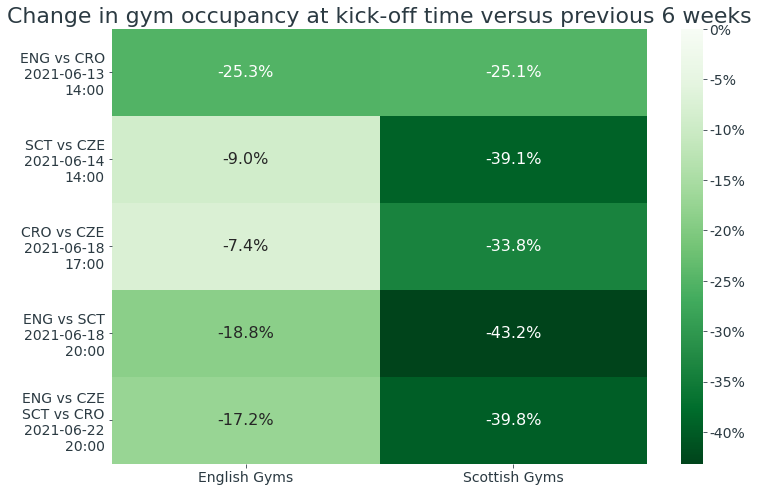

In [42]:
fig, ax = plt.subplots()
sns.heatmap(
    hm.T,
    ax=ax,
    annot=True,
    annot_kws={"size": 16},
    fmt=".1f",
    cmap="Greens_r",
    vmax=0,
)
ax.set_xlabel("")
cbar_ko = ax.collections[0].colorbar
for t in ax.texts:
    t.set_text(t.get_text() + "%")
cbar_ko.set_ticks([v for v in cbar_ko.get_ticks()])
cbar_ko.set_ticklabels([f"{int(v)}%" for v in cbar_ko.get_ticks()])
ax.set_title(
    "Change in gym occupancy at kick-off time versus previous 6 weeks",
    fontsize=22,
)
fig.savefig(ROOT_DIR / "figures" / "heatmap_kickoff.png")

In [43]:
hm_auc = change_eng_cro_auc.reset_index()
hm_auc.columns = ["country", "ENG vs CRO\n2021-06-13\n14:00"]

for change, name in zip(
    [
        change_sct_cze_auc,
        change_cro_cze_auc,
        change_eng_sct_auc,
        change_eng_cze_and_sct_cro_auc
    ],
    [
        "SCT vs CZE\n2021-06-14\n14:00",
        "CRO vs CZE\n2021-06-18\n17:00",
        "ENG vs SCT\n2021-06-18\n20:00",
        "ENG vs CZE\nSCT vs CRO\n2021-06-22\n20:00",
    ],
):
    change.columns = [name]
    hm_auc = pd.merge(
        hm_auc,
        change.reset_index(),
        on="country",
    )
hm_auc["country"] = hm_auc["country"].map(
    {"England": "English Gyms", "Scotland": "Scottish Gyms"}
)
hm_auc = hm_auc.set_index("country")
hm_auc

,ENG vs CRO\n2021-06-13\n14:00,SCT vs CZE\n2021-06-14\n14:00,CRO vs CZE\n2021-06-18\n17:00,ENG vs SCT\n2021-06-18\n20:00,ENG vs CZE\nSCT vs CRO\n2021-06-22\n20:00
country,,,,,
English Gyms,-16.18,-2.82,-8.36,-8.36,-3.11
Scottish Gyms,-15.82,-12.41,-24.06,-24.06,-16.40


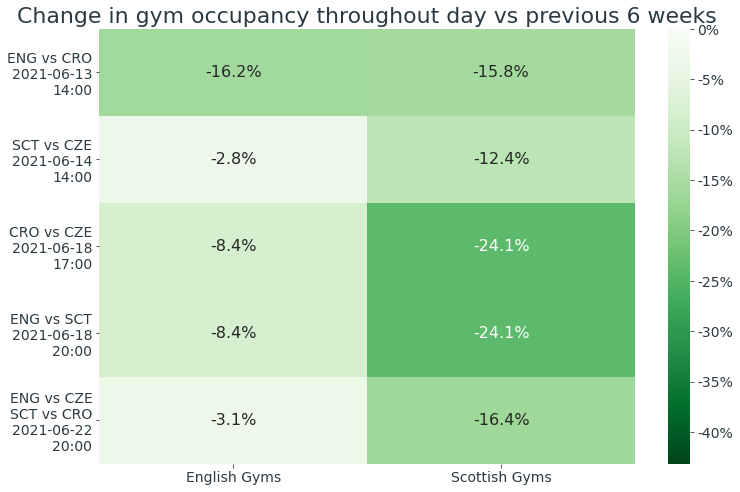

In [44]:
fig, ax = plt.subplots()
sns.heatmap(
    hm_auc.T,
    ax=ax,
    annot=True,
    annot_kws={"size": 16},
    fmt=".1f",
    cmap="Greens_r",
    vmax=0,
    vmin=cbar_ko.vmin,
)
ax.set_xlabel("")
cbar = ax.collections[0].colorbar
for t in ax.texts:
    t.set_text(t.get_text() + "%")
cbar.set_ticks([v for v in cbar.get_ticks()])
cbar.set_ticklabels([f"{int(v)}%" for v in cbar.get_ticks()])
ax.set_title(
    "Change in gym occupancy throughout day vs previous 6 weeks",
    fontsize=22,
)
fig.savefig(ROOT_DIR / "figures" / "heatmap_auc.png")

## Overview of All Analyses

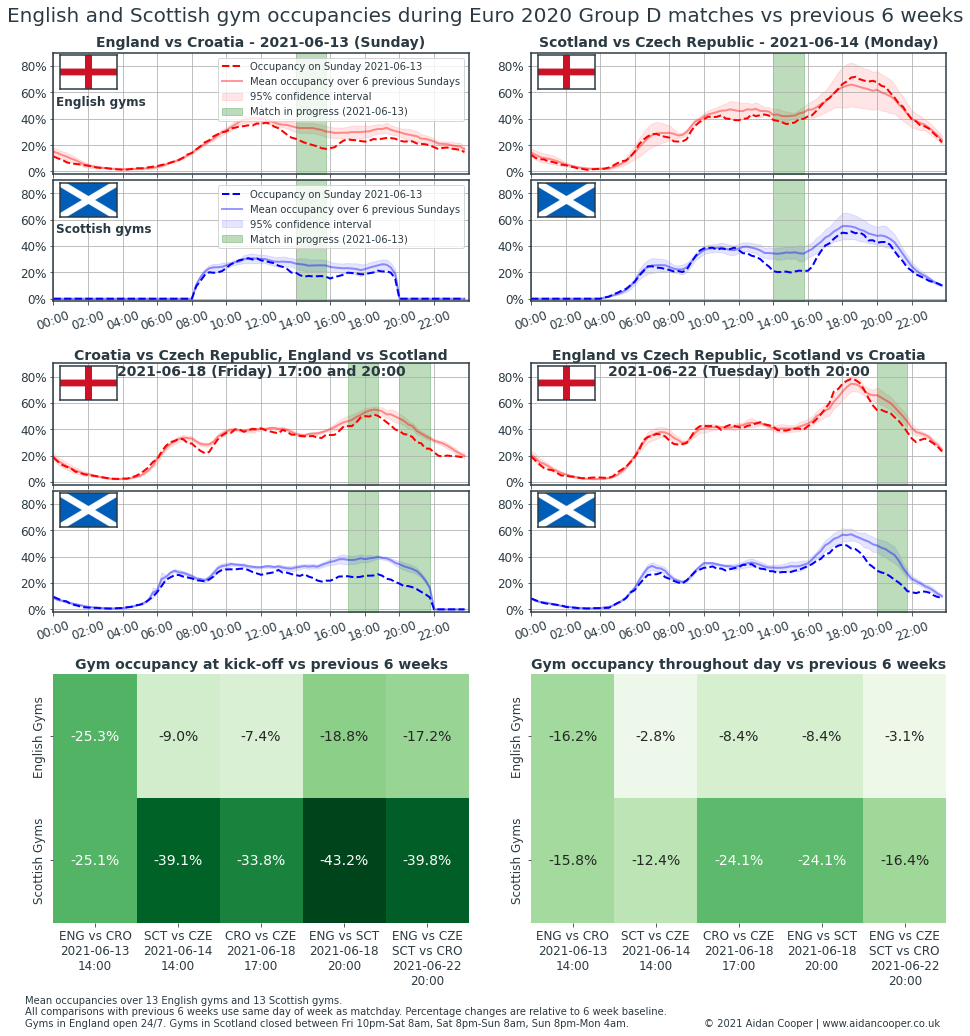

In [45]:
fig = plt.figure(figsize=(16, 16))
outer = gridspec.GridSpec(3, 2, wspace=0.15, hspace=0.25)

dow_map = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday",
}

# Individual games
for i, md, A, B, ko in zip(
    [0, 1, 2, 3],
    ["2021-06-13", "2021-06-14", "2021-06-18", "2021-06-22"],
    ["England", "Scotland", "Croatia", "A"],
    ["Croatia", "Czech Republic", "Czech Republic", "B"],
    [14, 14, 17, 20, 20],
):
    inner = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.05
    )
    df = prep_data(df_raw, md)

    for j, country in enumerate(["England", "Scotland"]):
        ax = plt.Subplot(fig, inner[j])
        plot_match(df, md, country, ko, colours[j], ax, ylim=0.85, gym_text=False)
        ax.set_xlabel("")
        if i != 0:
            ax.legend().remove()
        else:
            ax.legend(fontsize=10, loc="upper right", frameon=True)
            if j == 0:
                ax.text(0.15, 50, "English gyms", fontsize=12, fontweight="bold")
            else:
                ax.text(0.15, 50, "Scottish gyms", fontsize=12, fontweight="bold")
        if j == 0:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
        ax.tick_params(labelsize=12)
        if j == 0:
            dow = datetime.strptime(md, "%Y-%m-%d").isocalendar().weekday
            if md == "2021-06-22":
                ax.set_title(
                    f"England vs Czech Republic, Scotland vs Croatia\n2021-06-22 (Tuesday) both 20:00",
                    fontsize=14,
                    y=0.851,
                    fontweight="bold",
                    color="#2B3A42",
                )
            elif md == "2021-06-18":
                ax.set_title(
                    f"Croatia vs Czech Republic, England vs Scotland\n2021-06-18 (Friday) 17:00 and 20:00",
                    fontsize=14,
                    y=0.851,
                    fontweight="bold",
                    color="#2B3A42",
                )
                ax.fill_betweenx(
                    ax.get_ylim(),
                    [20, 20],
                    [21.75, 21.75],
                    color="#228B22",
                    alpha=0.3,
                    label=f"Match in progress ({match_date})",
                )
            else:
                ax.set_title(
                    f"{A} vs {B} - {md} ({dow_map[dow]})",
                    fontsize=14,
                    y=1,
                    fontweight="bold",
                    color="#2B3A42",
                )
        else:
            ax.set_title("")
            if md == "2021-06-18":
                ax.fill_betweenx(
                    ax.get_ylim(),
                    [20, 20],
                    [21.75, 21.75],
                    color="#228B22",
                    alpha=0.3,
                    label=f"Match in progress ({match_date})",
                )

        fig.add_subplot(ax)


# heat map kick-off
ax = plt.Subplot(fig, outer[4])
sns.heatmap(
    hm,
    ax=ax,
    annot=True,
    annot_kws={"size": 14},
    fmt=".1f",
    cmap="Greens_r",
    vmax=0,
)
for t in ax.texts:
    t.set_text(t.get_text() + "%")
ax.set_ylabel("")
cbar_ko = ax.collections[0].colorbar
cbar_ko.remove()
ax.set_title(
    "Gym occupancy at kick-off vs previous 6 weeks", fontsize=14, fontweight="bold"
)
ax.set_yticklabels(labels=ax.get_yticklabels(), va="center", fontsize=12)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0, fontsize=12)
fig.add_subplot(ax)

# heat map AUC
ax = plt.Subplot(fig, outer[5])
sns.heatmap(
    hm_auc,
    ax=ax,
    annot=True,
    annot_kws={"size": 14},
    fmt=".1f",
    cmap="Greens_r",
    vmax=0,
    vmin=cbar_ko.vmin,
)
for t in ax.texts:
    t.set_text(t.get_text() + "%")
ax.set_ylabel("")
cbar = ax.collections[0].colorbar
cbar.remove()
ax.set_title(
    "Gym occupancy throughout day vs previous 6 weeks", fontsize=14, fontweight="bold"
)
ax.set_yticklabels(labels=ax.get_yticklabels(), va="center", fontsize=12)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0, fontsize=12)
fig.add_subplot(ax)

# Title and footer
fig.suptitle(
    f"English and Scottish gym occupancies during Euro 2020 Group D matches vs previous 6 weeks",
    fontsize=20,
    y=0.92,
)
fig.text(
    0.1,
    0.035,
    "Mean occupancies over 13 English gyms and 13 Scottish gyms.\n"
    "All comparisons with previous 6 weeks use same day of week as matchday. Percentage changes are relative to 6 week baseline.\n"
    "Gyms in England open 24/7. Gyms in Scotland closed between Fri 10pm-Sat 8am, Sat 8pm-Sun 8am, Sun 8pm-Mon 4am.",
    fontsize=10,
)
fig.text(
    0.69,
    0.035,
    "© 2021 Aidan Cooper | www.aidancooper.co.uk",
    fontsize=10,
)
fig.savefig(ROOT_DIR / "figures" / "overview.png")
fig